Task 1

In [110]:
import numpy as np
import matplotlib.pyplot as plt

In [111]:
# Transition matrix P
P = np.array([[0.9915, 0.005, 0.0025, 0, 0.001],[0, 0.986, 0.005, 0.004, 0.005],[0, 0, 0.992, 0.003, 0.005],
             [0, 0, 0, 0.991, 0.009], [0,0,0,0,1]])

In [112]:
def MMC_simulation(transition_prob, initial_stat_prob = [1, 0, 0, 0, 0]):

    N_states = len(initial_stat_prob)
    current_state = []
    # all start at state 1
    current_state.append(np.random.choice(N_states, p=initial_stat_prob))
    month = 0
    while True:

        next_state = np.random.choice(N_states, p=transition_prob[current_state[-1], : ].reshape(-1))

        current_state.append(next_state)
        next_state = current_state[-1]

        month = month + 1


        if current_state[-1] == 4:
            break

    return current_state, month

In [113]:
def simulate_multiple_MMC(n_simulation, transition_prob, initial_stat_prob = [1, 0, 0, 0, 0]):

    months = []
    current_states = []
    for sim in range(n_simulation):

        current_state, month = MMC_simulation(transition_prob, initial_stat_prob)
        months.append(month)

        current_states.append(current_state)


    plt.hist(months, bins=int(len(months) / 10), edgecolor='black')
    plt.xlabel('Months until death')
    plt.ylabel('Frequency')
    plt.title('Histogram of months until death')
    plt.show()

    return current_states, months

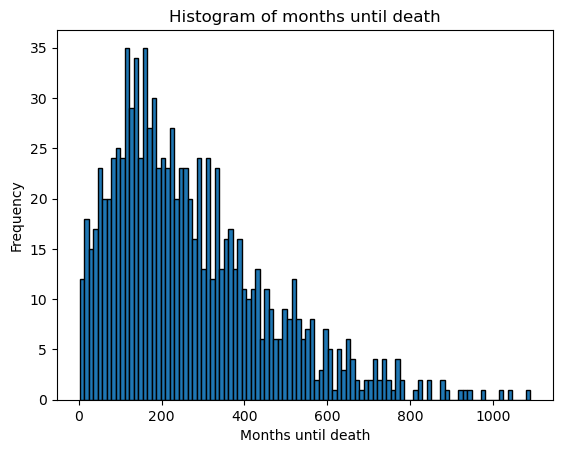

In [114]:
n_simulation = 1000
current_states, months = simulate_multiple_MMC(n_simulation, P)

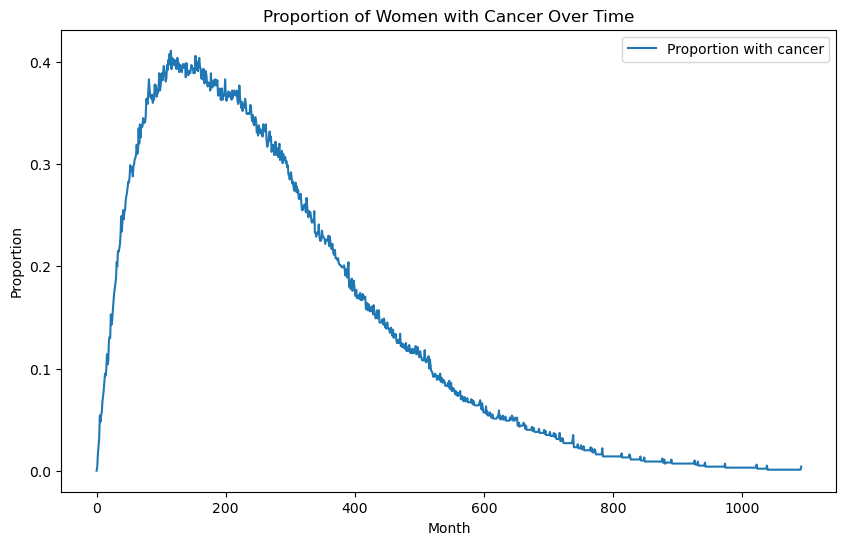

In [117]:
# Find the maximum length among all state trajectories
max_len = max(len(seq) for seq in current_states)

# Pad each sequence with zeros to make all sequences the same length
current_states_matrix = np.array([seq + [0] * (max_len - len(seq)) for seq in current_states])

current_states_matrix[np.isin(current_states_matrix, [1, 2, 3])] = 1

n_women_cancer = np.sum(current_states_matrix, axis=0)

prop = n_women_cancer / 1000

plt.figure(figsize=(10, 6))
plt.plot(range(len(prop)), prop, label='Proportion with cancer')
plt.xlabel('Month')
plt.ylabel('Proportion')
plt.title('Proportion of Women with Cancer Over Time')
plt.legend()
plt.show()

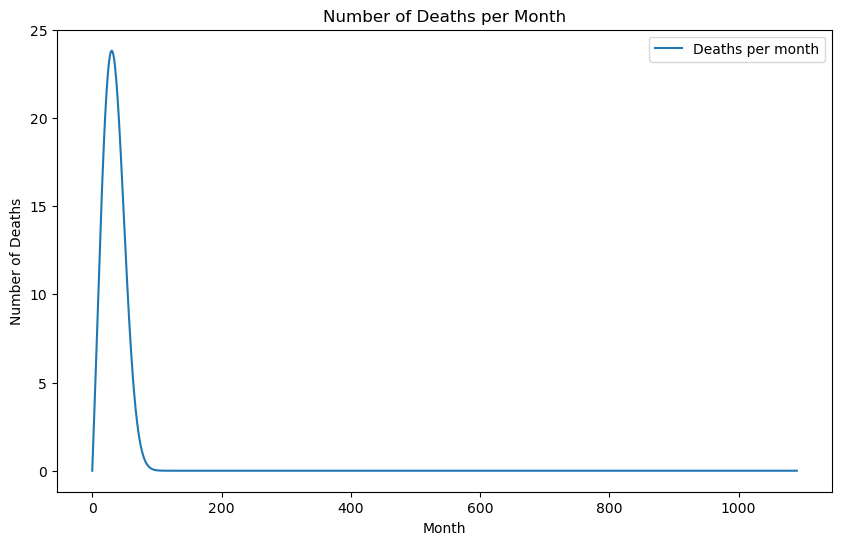

In [116]:
initial_stat_prob = [1, 0, 0, 0, 0]
p_t = np.array([initial_stat_prob @ np.linalg.matrix_power(P, t) for t in range(np.max(months))])

p_death = p_t[:, -1]
n_woman = 1000

deaths = []
for t in range(len(p_death)):

    deaths.append(n_woman * p_death[t])

    n_woman = n_woman - deaths[-1]

plt.figure(figsize=(10, 6))
plt.plot(range(len(deaths)), deaths, label='Deaths per month')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths per Month')
plt.legend()
plt.show()